In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [8]:
import magpylib as mp

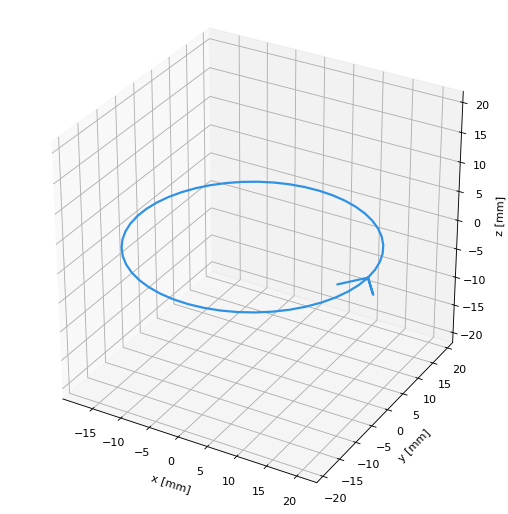

In [9]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)

In [10]:
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

In [20]:
np.save('results/B.npy',B)

(-6.0, -3.5)

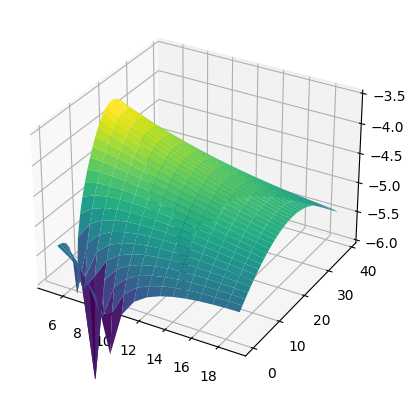

In [11]:
from matplotlib import pyplot as plt
x=np.arange(5,20,1)
z=np.arange(0,40,1)
X,Z=np.meshgrid(x,z)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Z,np.log10(np.abs(B[:,22,5:,2])),cmap='viridis',edgecolor='none')
ax.set_zlim(-6,-3.5)

In [73]:
def get_signal_strength(x,y,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k):
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=r)
    B1=current_loop.getB((x+dx1,y+dy1,z+dz1))[2]
    B2=current_loop.getB((x+dx2,y+dy2,z+dz2))[2]
    return np.log10(k*B1*B2)

In [32]:
def get_signal_strength(x,y,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k):
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=r)
    c1 = 300
    c2 = -120
    c3 = 20
    B1=current_loop.getB((20*x+c2,c3,c1 - 20*y))[2]
    B2=current_loop.getB((20*x+c2,c3,c1 - 20*y))[2]
    return np.log10(k*B1*B2)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple

In [14]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

In [15]:
examplefile = "results/mar_1/(180, 60)"
signal = read_complex_binary2(examplefile)
examplefile = "results/mar_1/(180, 60)"
signal2 = read_complex_binary2(examplefile)

np.fft.fftshift(np.fft.fft(signal))
np.fft.fftshift(np.fft.fft(signal2))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
transformed_fft_sig2 = np.log10(np.fft.fftshift(np.fft.fft(signal2)))
plt.plot(transformed_fft_sig)
plt.plot(transformed_fft_sig2)
plt.show()
indices_low = np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4))
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))[14500000:15000000]
plt.plot(transformed_fft_sig)
plt.show()
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))

FileNotFoundError: [Errno 2] No such file or directory: 'results/mar_1/(180, 60)'

In [16]:
file_path = "results/mar_1/"
matrix  = np.zeros((10, 10))
for files in glob.glob(file_path+"*"):
    splitty = files.split("/")[-1]
    tup_split = make_tuple(splitty)
    x = int(tup_split[0]/20)
    y = int(tup_split[1]/20)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
    #low_value = transformed_fft_sig[bin_value1]
    high_value = transformed_fft_sig[14500000:15000000]
    high_value = np.max(high_value)
    matrix[x][y] = high_value

Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here


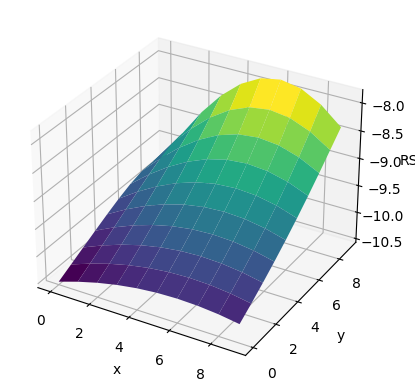

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(0,10,1)
y = np.arange(0,10,1)
X, Y = np.meshgrid(x, y)
Z  = np.zeros((10, 10))
for xi in x:
    for yi in y:
        print("Here")
        Z[xi][yi] = get_signal_strength(xi,yi,0,0,0,0,0,0,0,39,1)
ax.plot_surface(Y, X, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI');

In [18]:
xdata,ydata=[],[]
for i in range(10):
    for j in range(10):
        xdata.append((i*20,j*20))
        ydata.append(matrix[i][j])
xdata=np.array(xdata).T

In [20]:
from scipy.optimize import curve_fit
def get_signal_strength_wrapper(xdata,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k):
    xs,ys=xdata
    results=[]
    for x,y in zip(xs,ys):
        results.append(get_signal_strength(x,y,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k))
    return np.array(results)
ans=curve_fit(get_signal_strength_wrapper,xdata,ydata,p0=[0,0,0,0,0,0,0,10,10],maxfev = 100000000) # Params: z, dx1, dy1, dz1, dx2, dy2, dz2, r, k

/tmp/ipykernel_190298/2036355654.py:8: RuntimeWarning: invalid value encountered in log10
  return np.log10(k*B1*B2)


KeyboardInterrupt: 